<a href="https://colab.research.google.com/github/stephe-hu/datasci_4_web_viz/blob/main/datasci4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. R's Shiny Visualization

In [1]:
# Load in packages
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [11]:
# Load in data
df = pd.read_csv('https://raw.githubusercontent.com/stephe-hu/datasci_4_web_viz/main/datasets/PLACES__Local_Data_for_Better_Health__County_Data_2023_release.csv')
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [12]:
#  Filter for 'BINGE' as measureid and 'Age-adjusted prevalence' as data_value_type
df = df[(df['MeasureId'] == 'DEPRESSION') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
55,2021,CA,California,Plumas,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,21.3,...,17.4,25.6,19915,6063,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-120.8243709 39.9922953),1176.0
76,2021,CA,California,Butte,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,21.5,...,17.5,25.7,208309,6007,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-121.6032086 39.6653362),1183.0
279,2021,CA,California,Tulare,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,19.1,...,15.8,22.9,477054,6107,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-118.7810551 36.2288339),81.0
287,2021,CA,California,Merced,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,18.4,...,15.0,22.2,286461,6047,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-120.7228019 37.1948063),1169.0
293,2021,CA,California,San Diego,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,16.7,...,14.1,19.5,3286069,6073,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-116.7761174 33.0236041),1179.0
358,2021,CA,California,Glenn,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,20.5,...,16.9,24.5,28805,6021,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-122.4016998 39.6025462),73.0
364,2021,CA,California,Lassen,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,19.2,...,15.6,23.1,33159,6035,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-120.6212225 40.7152866),1194.0
469,2021,CA,California,Alpine,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,20.3,...,18.2,22.2,1235,6003,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-119.7983522 38.6217831),1142.0
487,2021,CA,California,Calaveras,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,21.8,...,17.9,26.1,46221,6009,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-120.5541065 38.1910682),1184.0
636,2021,CA,California,Sacramento,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,18.3,...,15.5,21.3,1588921,6067,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-121.3443291 38.4501363),77.0


In [13]:
# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped

LocationName
Humboldt           23.1
Siskiyou           22.5
Trinity            22.4
Lake               22.1
Tehama             22.0
Calaveras          21.8
El Dorado          21.7
Modoc              21.7
Shasta             21.5
Butte              21.5
Plumas             21.3
Nevada             21.2
Sierra             21.0
Mariposa           20.9
Tuolumne           20.7
Del Norte          20.5
Glenn              20.5
Stanislaus         20.4
Alpine             20.3
Yuba               20.3
Mendocino          20.2
Sonoma             19.8
Amador             19.8
Mono               19.7
Madera             19.6
Inyo               19.6
San Luis Obispo    19.2
Lassen             19.2
Tulare             19.1
Colusa             19.0
Santa Barbara      19.0
Kern               19.0
Santa Cruz         18.7
Placer             18.7
Merced             18.4
Sutter             18.4
Sacramento         18.3
Yolo               18.3
Monterey           18.3
Kings              18.1
Napa               17.8
San

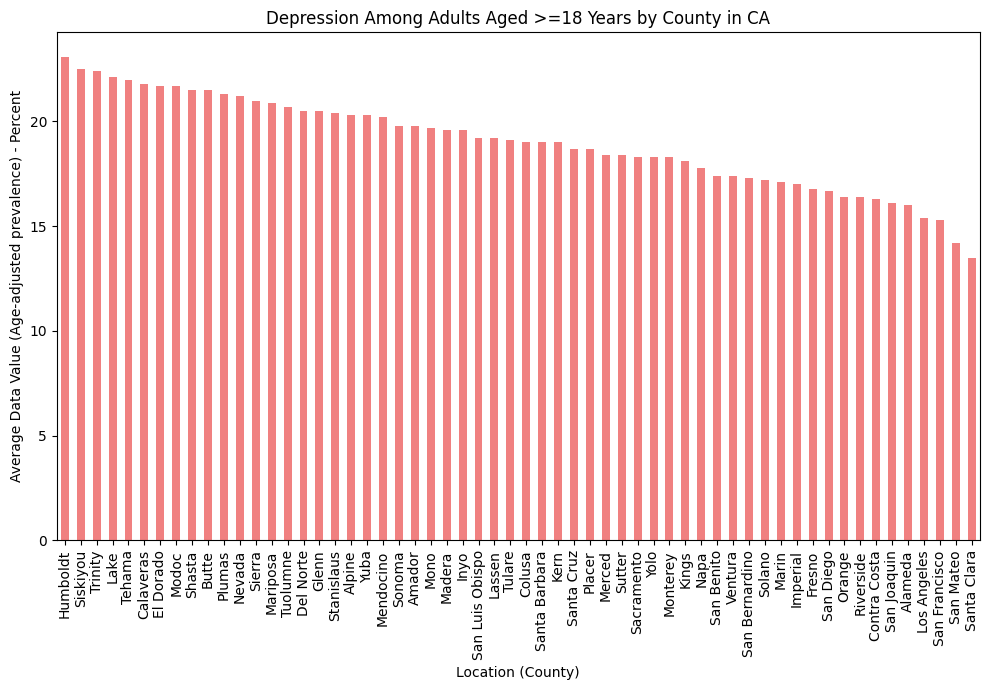

In [14]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Depression Among Adults Aged >=18 Years by County in CA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("depression_per_location.png")  # Saving the plot as an image
plt.show()

In [15]:
# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Depression Among Adults Aged >=18 Years in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Alameda', 'Alpine', 'Amador', 'Butte', 'Calaver…